In [1]:
import os

import numpy as np
from sklearn.manifold import TSNE
import pandas as pd

import matplotlib
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

from utils import load_hidden_representations_from_hdf5, read_templates_from_file

----

In [2]:
# params
log_dir = "/logfiles"
model = "bigscience-T0"
module = "encoder"
task = "rte"

In [3]:
# assertions
assert model == "bigscience-T0"
assert module == "encoder"
assert task == "rte"

## Prompts

In [4]:
df = read_templates_from_file(f"/t0-analysis/prompts/{task}/all.csv")
# df = read_templates_from_file(f"/t0-analysis/prompts/{task}/fixed_prompt.csv")
# df = read_templates_from_file(f"/t0-analysis/prompts/{task}/fixed_target_yes_no.csv")
display(df)

name  \
0                gpt_3_yes_no_with_targets   
1            mnli_crowdsource_with_targets   
2   based_on_previous_passage_with_targets   
3                       infer_with_targets   
4                      follow_with_targets   
5                       imply_with_targets   
6                  guaranteed_with_targets   
7                   justified_with_targets   
8                must_be_true_with_targets   
9               should_assume_with_targets   
10           gpt_3_true_false_with_targets   
11              gpt_3_cat_dog_with_targets   
12            gpt_3_yes_no_without_targets   

                                             template     category  \
0         {premise} Question: {hypothesis} Yes or No?  instructive   
1   {premise} Using only the above description and...  instructive   
2   {premise} Based on the previous passage, is it...  instructive   
3   Suppose {premise} Can we infer that "{hypothes...  instructive   
4   Given that {premise} Does it follow that {hypo...  instructive   
5   {premise} Question: Does this imply that "{hyp...  instructive   
6   Given {premise} Is it guaranteed true that "{h...  instructive   
7   {premise} Are we justified in saying that "{hy...  instructive   
8   Given that {premise} Therefore, it must be tru...  instructive   
9   Given {premise} Should we assume that "{hypoth...  instructive   
10    {premise} Question: {hypothesis} True or False?  instructive   
11       {premise} Question: {hypothesis} Cat or Dog?  instructive   
12                  {premise} Question: {hypothesis}?  instructive   

    includes_targets      targets target_ids  shuffle  
0               True    ▁Yes, ▁No       0, 1    False  
1               True    ▁Yes, ▁No       0, 1    False  
2               True    ▁Yes, ▁No       0, 1    False  
3               True    ▁Yes, ▁No       0, 1    False  
4               True    ▁Yes, ▁No       0, 1    False  
5               True    ▁Yes, ▁No       0, 1    False  
6               True    ▁Yes, ▁No       0, 1    False  
7               True    ▁Yes, ▁No       0, 1    False  
8               True    ▁Yes, ▁No       0, 1    False  
9               True    ▁Yes, ▁No       0, 1    False  
10              True  ▁True, ▁Fal       0, 1    False  
11              True   ▁Cat, ▁Dog       0, 1    False  
12             False    ▁Yes, ▁No       0, 1    False

In [5]:
# load prompted inputs and labels
df_inputs = {}
for _, row in df.iterrows():
    prompt = row['name']
    df_inputs[prompt] = pd.read_csv(f"/logfiles/{task}/{model}/{module}/{prompt}/prompted_samples.csv", sep='\t', index_col=0)


In [6]:
df_inputs['gpt_3_yes_no_with_targets'].head()

input           label  \
0  Dana Reeve, the widow of the actor Christopher...  not_entailment   
1  Yet, we now are discovering that antibiotics a...      entailment   
2  Cairo is now home to some 15 million people - ...  not_entailment   
3  The Amish community in Pennsylvania, which num...  not_entailment   
4  Security forces were on high alert after an el...      entailment   

       prediction  
0  not_entailment  
1  not_entailment  
2  not_entailment  
3  not_entailment  
4      entailment

In [7]:
# load decoded predictions
df_outputs = {}
for _, row in df.iterrows():
    prompt = row['name']
    df_outputs[prompt] = pd.read_csv(f"/logfiles/{task}/{model}/{module}/{prompt}/decoded_predictions.csv", sep='\t', names=['predicitons'])

In [8]:
df_outputs['gpt_3_yes_no_with_targets'].head()

predicitons
0   ['<pad>', '▁No', '</s>']
1   ['<pad>', '▁No', '</s>']
2   ['<pad>', '▁No', '</s>']
3   ['<pad>', '▁No', '</s>']
4  ['<pad>', '▁Yes', '</s>']

## Plot t-SNE embeddings

In [10]:
use_pattern = [
    "gpt_3_yes_no_with_targets",
    # "mnli_crowdsource_with_targets",
    # "based_on_previous_passage_with_targets",
    "infer_with_targets",
    "follow_with_targets",
    # "imply_with_targets",
    # "guaranteed_with_targets",
    # "justified_with_targets",
    # "must_be_true_with_targets",
    # "should_assume_with_targets",
    "gpt_3_true_false_with_targets",
    "gpt_3_cat_dog_with_targets",
    "gpt_3_yes_no_without_targets",
]

In [11]:
# use either ground-truth or predicted label for marker size
# marker_size = 'ground-truth'
marker_size = 'predicted'

(1662, 4096)


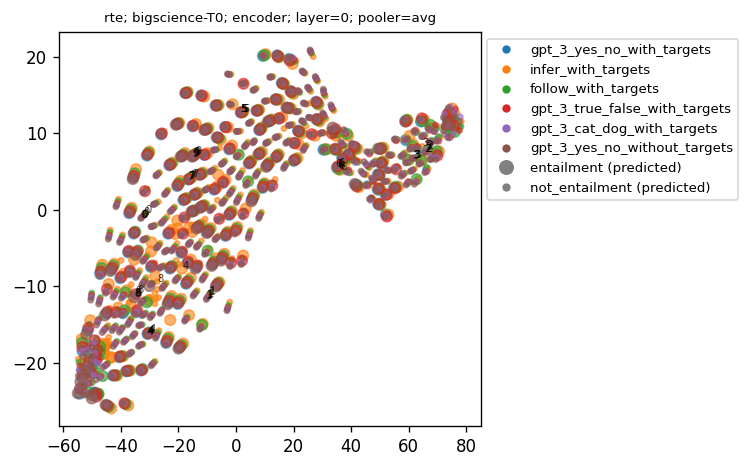

(1662, 4096)


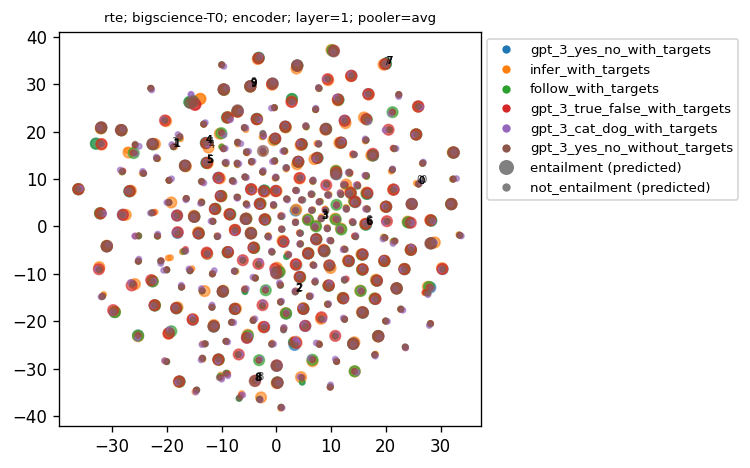

(1662, 4096)


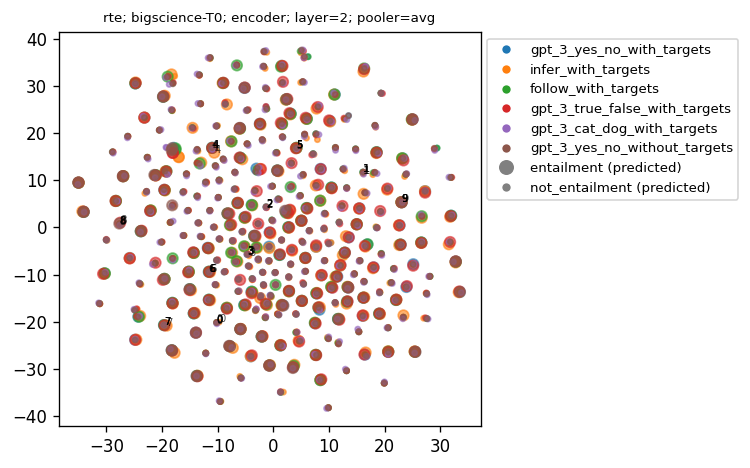

(1662, 4096)


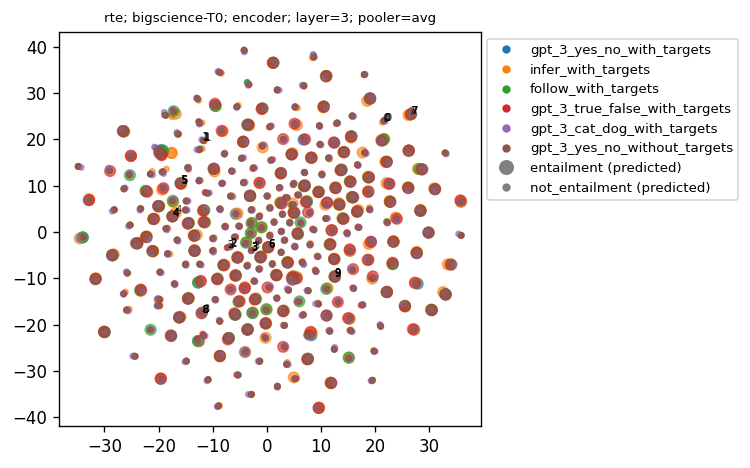

(1662, 4096)


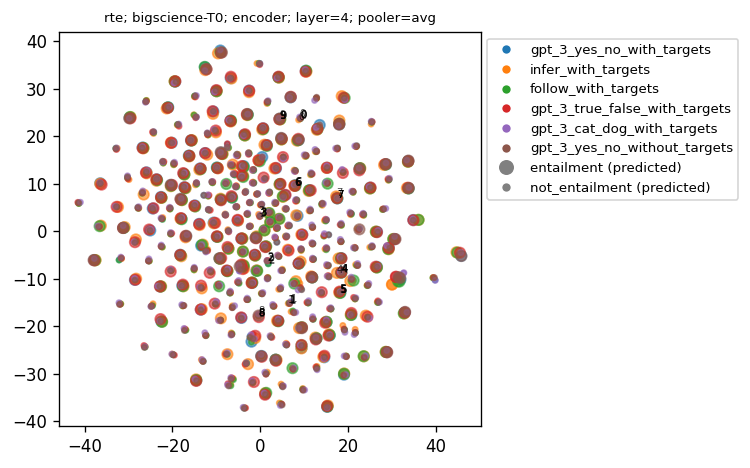

(1662, 4096)


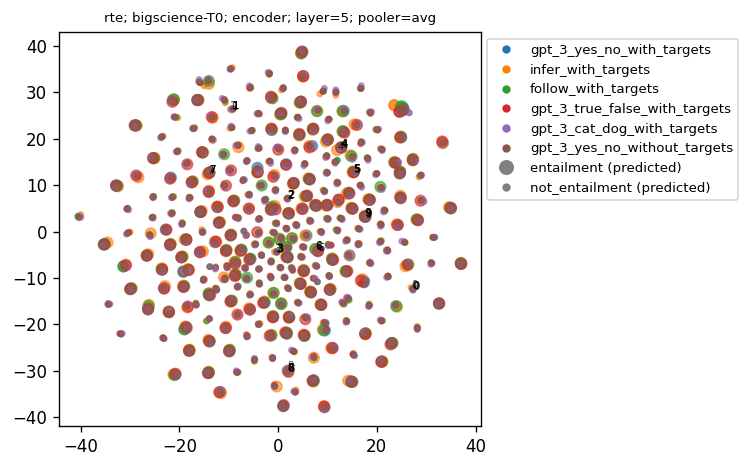

(1662, 4096)


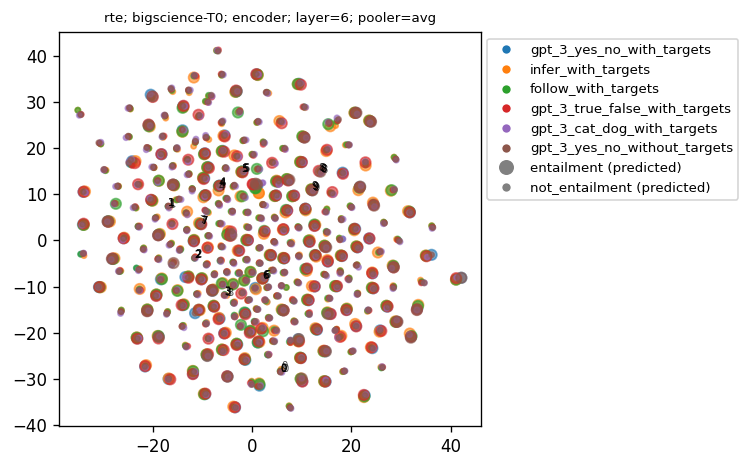

(1662, 4096)


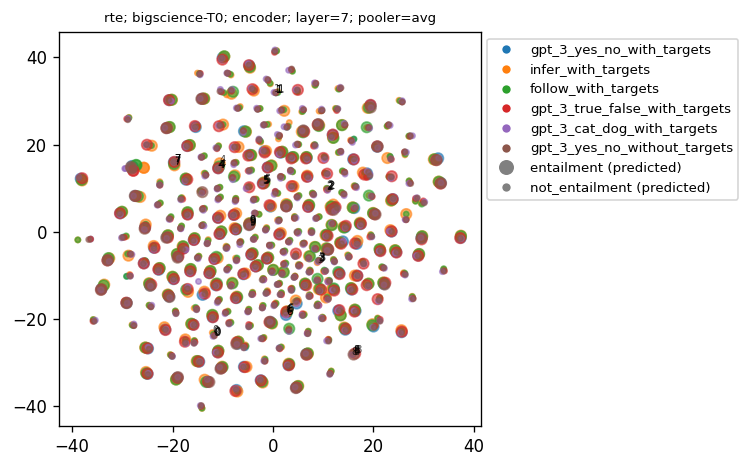

(1662, 4096)


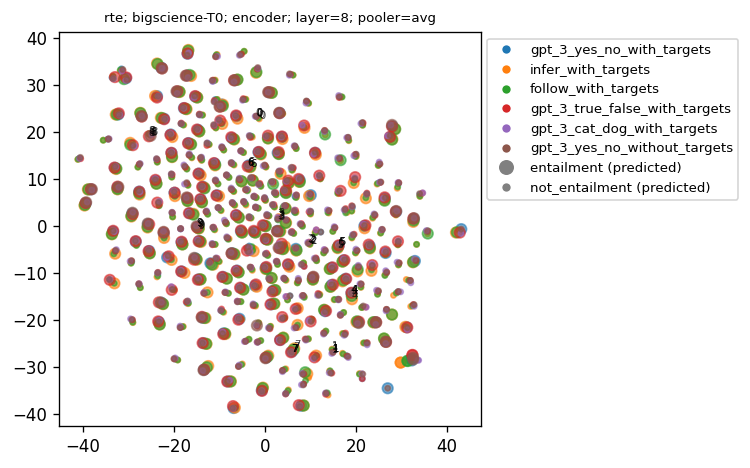

(1662, 4096)


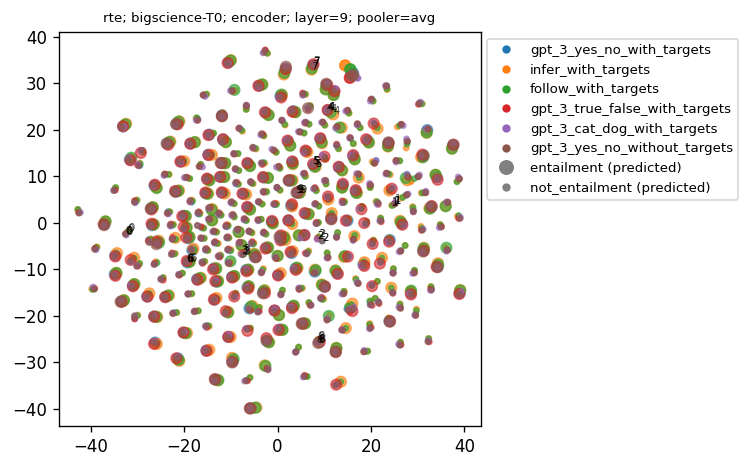

(1662, 4096)


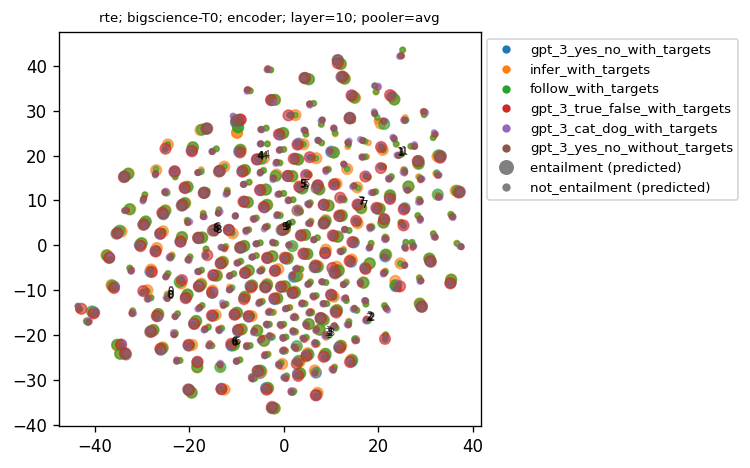

(1662, 4096)


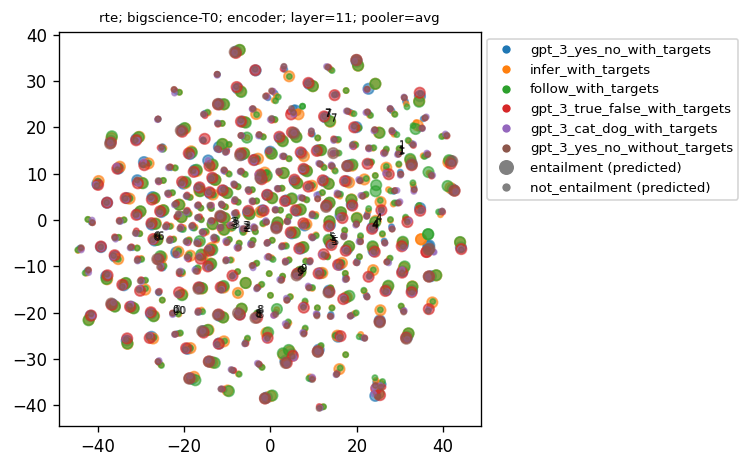

(1662, 4096)


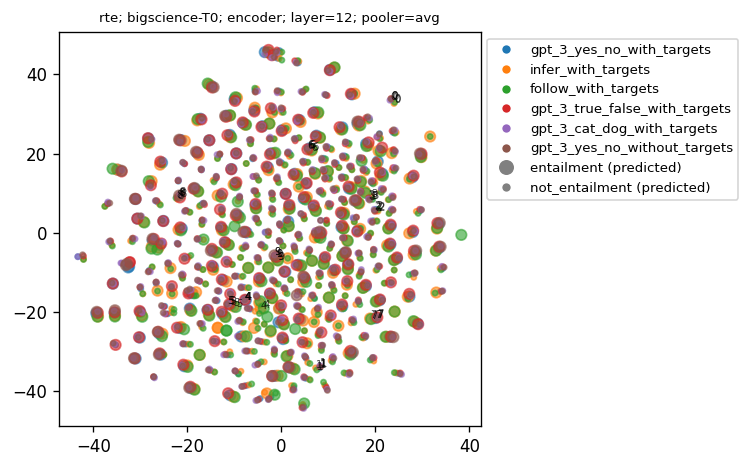

(1662, 4096)


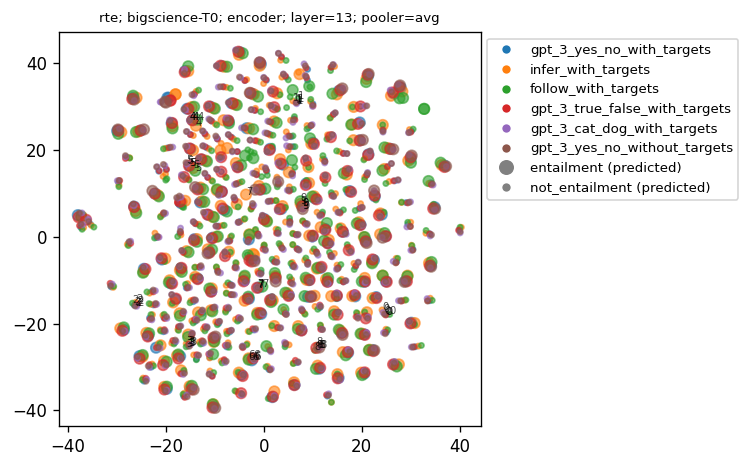

(1662, 4096)


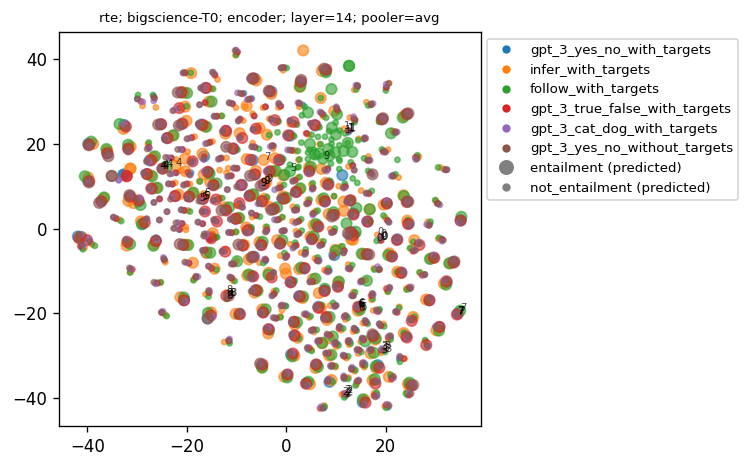

(1662, 4096)


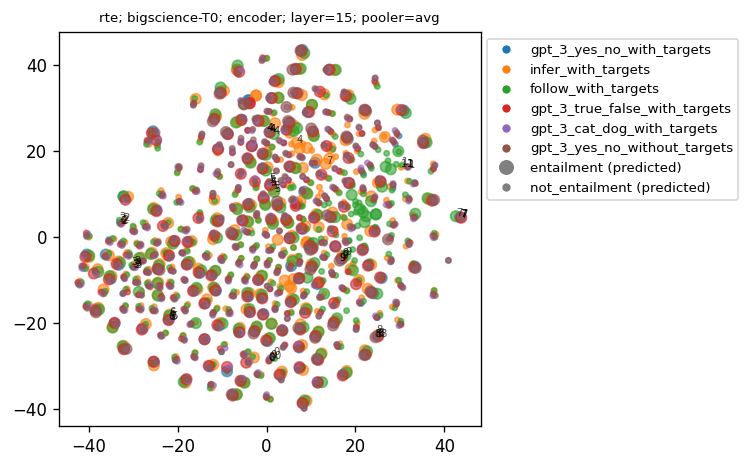

(1662, 4096)


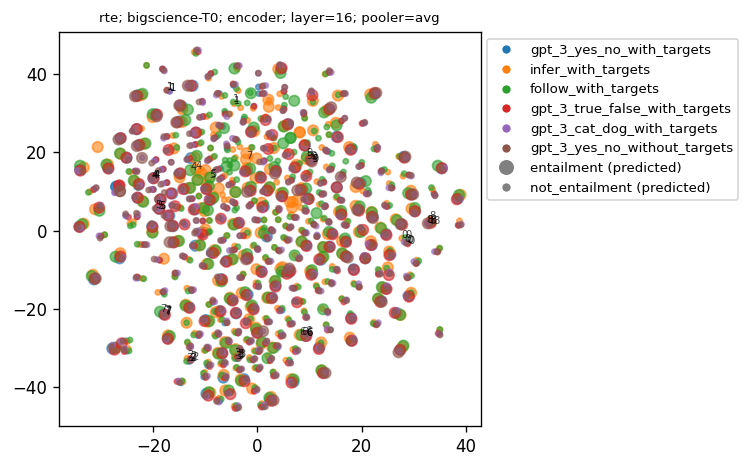

(1662, 4096)


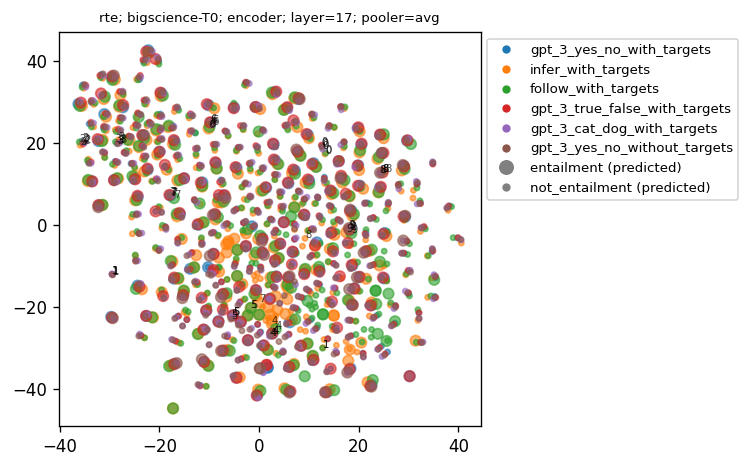

(1662, 4096)


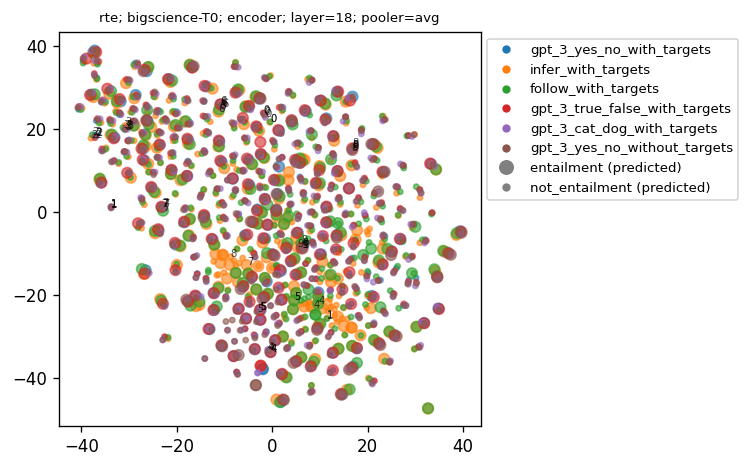

(1662, 4096)


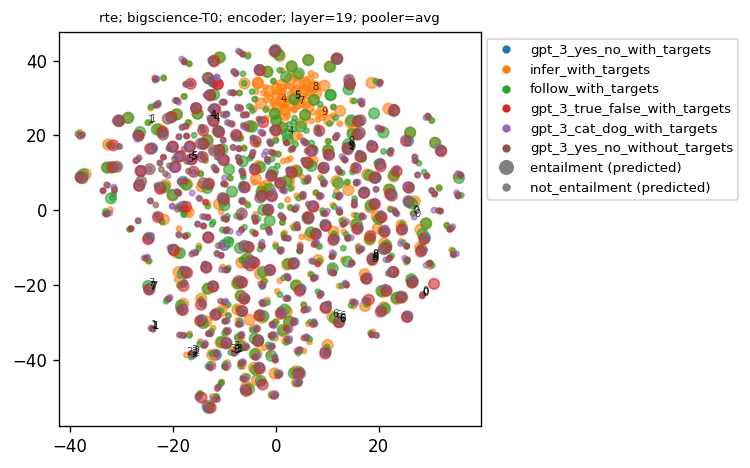

(1662, 4096)


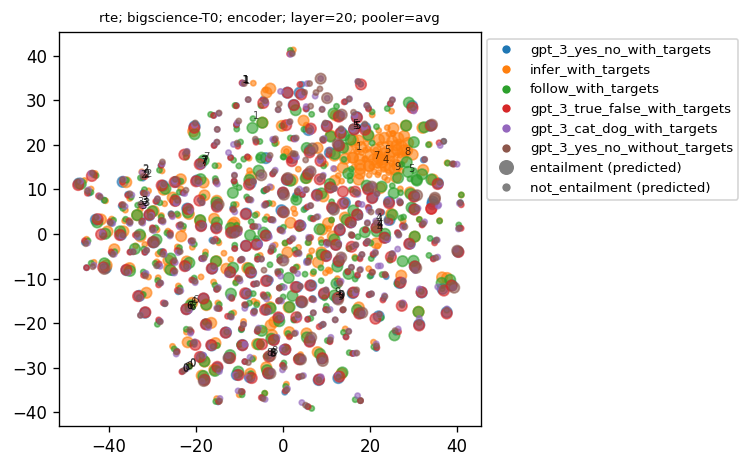

(1662, 4096)


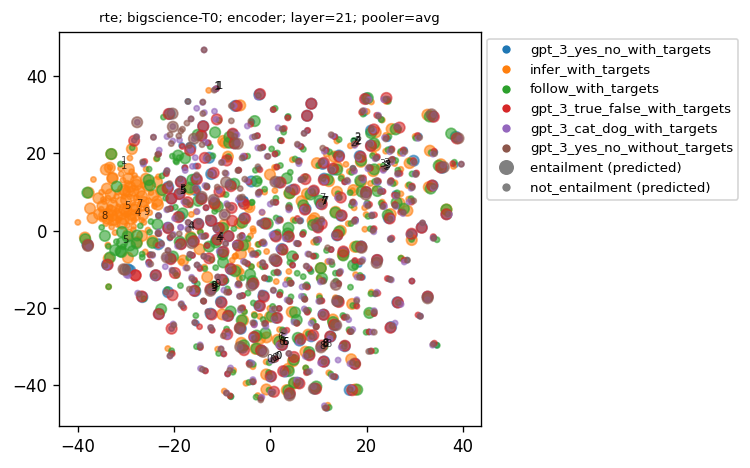

(1662, 4096)


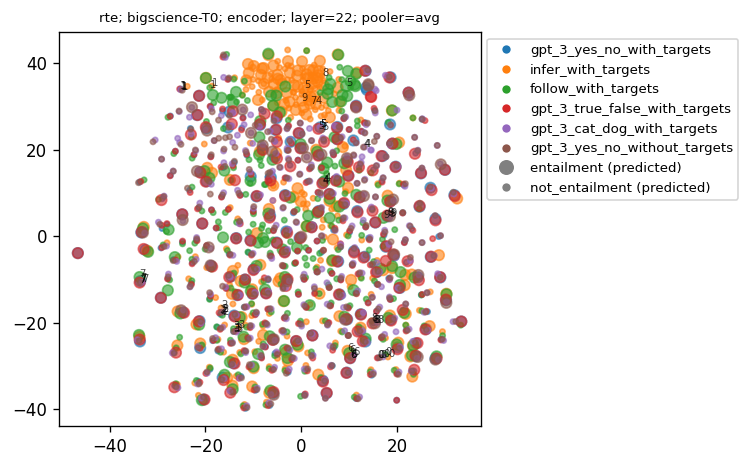

(1662, 4096)


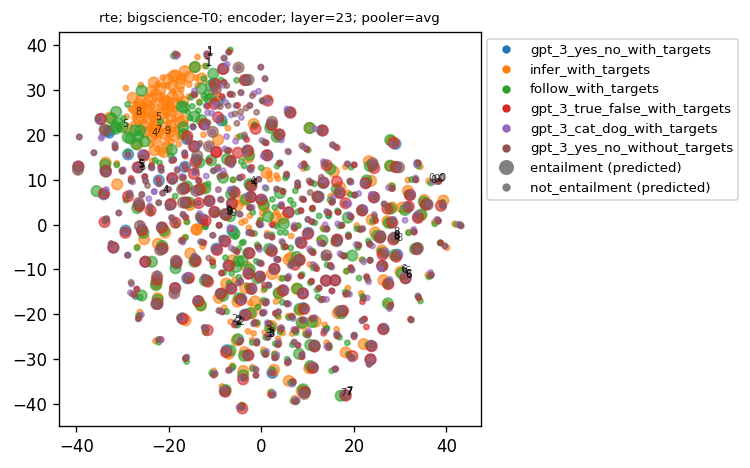

(1662, 4096)


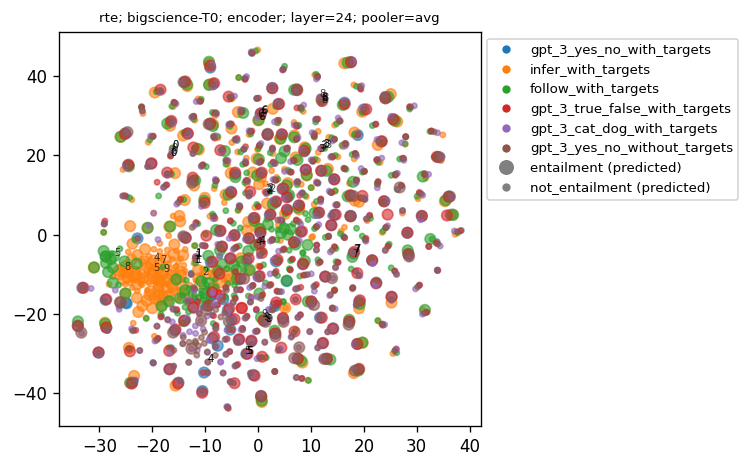

In [13]:
# for layer in range(0, 1):
# for layer in range(0, 5):
for layer in range(0, 25):
# for layer in range(23, 25):
    
    file_names, prompt_names = [], []
    
    for _, row in df.iterrows():
        if row['name'] in use_pattern:
            file_names.append(f"{task}/{model}/{module}/{row['name']}/hidden_represenations_layer{layer}_avg.hdf5")
            prompt_names.append(row['name'])
    
    # load hidden representations from hdf5 file
    representations = None
    n_sequences = 0

    for file_name in file_names:
        hidden_representations = load_hidden_representations_from_hdf5(os.path.join(log_dir, file_name), silent=True)
        n_sequences = hidden_representations.shape[0]

        if representations is None:
            representations = hidden_representations
        else:
            representations = np.concatenate((representations, hidden_representations), axis=0)

    print(representations.shape)

    # compute t-SNE embeddings
    X = TSNE(
        n_components=2, 
        perplexity=100, 
        init='random', # random or pca
        learning_rate=200,
        n_iter=1000
    ).fit_transform(representations)

    # plot t-SNE embeddings
    fig, axes = plt.subplots(1, 1, figsize=(5.5,4), dpi=120)
    legend_elements= []

    cmap = matplotlib.cm.get_cmap('tab10')
    # cmap = matplotlib.cm.get_cmap('tab20')
    colors = cmap.colors

    for idx, file_name in enumerate(file_names):
        # create a scatter plot for samples from each pattern
        x, y = X[n_sequences*idx:n_sequences*(idx + 1), 0], X[n_sequences*idx:n_sequences*(idx + 1), 1]

        # change size according to label
        if marker_size == 'ground-truth':
            labels = df_inputs[prompt_names[idx]]['label'].values
            sizes = [40.0 if l == 'entailment' else 10.0 for l in labels]
        elif marker_size == 'predicted':
            labels = df_inputs[prompt_names[idx]]['prediction'].values
            sizes = [40.0 if l == 'entailment' else 10.0 for l in labels]

        axes.scatter(x, y, alpha=0.6, color=colors[idx], s=sizes)

        # create legend element manually
        legend_elements.append(Line2D([0], [0], marker='o', color='w', label=prompt_names[idx], markerfacecolor=colors[idx], markersize=6))

        # annotate scatter plot with text
        samles_indices = np.random.choice(range(n_sequences), size=20)
        # for i, txt in enumerate(list(range(n_sequences))): # annotate all samples
        # for i, txt in enumerate(samles_indices): # annotate randomly choosen samples
        for i, txt in enumerate(range(10)): # annotate first 10 samples
            axes.annotate(txt, (x[i], y[i]), alpha=0.7, fontsize=6)

    axes.set_title(f"{task}; {model}; {module}; layer={layer}; pooler=avg", fontsize=8)

   # Shrink current axis by 20%
    box = axes.get_position()
    axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    # ground-truth labels
    if marker_size == 'ground-truth':
        legend_elements.append(Line2D([0], [0], marker='o', color='w', label='entailment', markerfacecolor='gray', markersize=10))
        legend_elements.append(Line2D([0], [0], marker='o', color='w', label='not_entailment', markerfacecolor='gray', markersize=6))

    # predicted labels
    elif marker_size == 'predicted':
        legend_elements.append(Line2D([0], [0], marker='o', color='w', label='entailment (predicted)', markerfacecolor='gray', markersize=10))
        legend_elements.append(Line2D([0], [0], marker='o', color='w', label='not_entailment (predicted)', markerfacecolor='gray', markersize=6))
    axes.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.0, 1.0), fancybox=True, shadow=False, fontsize=8)

    plt.tight_layout()

    plt.show()
    plt.close();

In [14]:
df

name  \
0                gpt_3_yes_no_with_targets   
1            mnli_crowdsource_with_targets   
2   based_on_previous_passage_with_targets   
3                       infer_with_targets   
4                      follow_with_targets   
5                       imply_with_targets   
6                  guaranteed_with_targets   
7                   justified_with_targets   
8                must_be_true_with_targets   
9               should_assume_with_targets   
10           gpt_3_true_false_with_targets   
11              gpt_3_cat_dog_with_targets   
12            gpt_3_yes_no_without_targets   

                                             template     category  \
0         {premise} Question: {hypothesis} Yes or No?  instructive   
1   {premise} Using only the above description and...  instructive   
2   {premise} Based on the previous passage, is it...  instructive   
3   Suppose {premise} Can we infer that "{hypothes...  instructive   
4   Given that {premise} Does it follow that {hypo...  instructive   
5   {premise} Question: Does this imply that "{hyp...  instructive   
6   Given {premise} Is it guaranteed true that "{h...  instructive   
7   {premise} Are we justified in saying that "{hy...  instructive   
8   Given that {premise} Therefore, it must be tru...  instructive   
9   Given {premise} Should we assume that "{hypoth...  instructive   
10    {premise} Question: {hypothesis} True or False?  instructive   
11       {premise} Question: {hypothesis} Cat or Dog?  instructive   
12                  {premise} Question: {hypothesis}?  instructive   

    includes_targets      targets target_ids  shuffle  
0               True    ▁Yes, ▁No       0, 1    False  
1               True    ▁Yes, ▁No       0, 1    False  
2               True    ▁Yes, ▁No       0, 1    False  
3               True    ▁Yes, ▁No       0, 1    False  
4               True    ▁Yes, ▁No       0, 1    False  
5               True    ▁Yes, ▁No       0, 1    False  
6               True    ▁Yes, ▁No       0, 1    False  
7               True    ▁Yes, ▁No       0, 1    False  
8               True    ▁Yes, ▁No       0, 1    False  
9               True    ▁Yes, ▁No       0, 1    False  
10              True  ▁True, ▁Fal       0, 1    False  
11              True   ▁Cat, ▁Dog       0, 1    False  
12             False    ▁Yes, ▁No       0, 1    False